In [2]:
from image_data_quality.image_dataset import Imagelab
from PIL import Image
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display

In [3]:
# pip install matplotlib

In [4]:
pd.set_option('display.max_rows', 20)

In [5]:
dataset_path = "../image_files/"

In [6]:
imagelab = Imagelab(dataset_path, thumbnail_size=(128, 128))
print(f"Number of images: {str(len(imagelab.image_files))}")

Number of images: 517


In [7]:
issue_name = "Blurred"

In [8]:
threshold = 0.5
issue_specific_thresholds = {
    "Duplicated": threshold,
    "DarkImages": 0.08,
    "LightImages": 0.05,
    "AspectRatio": 0.5,
    "Blurred": 0.3,
    "Entropy": threshold,
    "NearDuplicates": threshold,
    "Grayscale": threshold,
    "HotPixels": threshold,
}

In [9]:
issues = imagelab.evaluate([issue_name])

Checking for Blurred


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 517/517 [00:01<00:00, 356.86it/s]


In [10]:
imagelab.aggregate(issue_specific_thresholds)

In [11]:
summary, results_df = imagelab.summary()

Color spaces in the  dataset
{'L': 12, 'RGB': 505}

Issue Summary
             Issues  Percent of Data  Issue Intensity
Blurred raw     NaN              NaN         1.000053
Blurred        27.0         0.052224        -0.000053



In [12]:
sorted_df = results_df.sort_values(by=[f'{issue_name} score'])

In [13]:
sorted_df.head()

,image_name,Blurred raw_score,Blurred score,Blurred bool
516,syn_hotpixel.jpg,3.013419,0.003009,True
179,ILSVRC2012_val_00014432.JPEG,90.173937,0.086228,True
510,blur.JPEG,100.237136,0.095377,True
457,ILSVRC2012_val_00044097.JPEG,103.175754,0.098032,True
514,blur5.JPEG,111.608648,0.105606,True


In [14]:
scores = np.array(sorted_df[f'{issue_name} score'])
raw_scores = np.array(sorted_df[f'{issue_name} raw_score'])
# raw_scores

In [37]:
threshold=0.3

In [38]:
files =list(sorted_df[sorted_df[f'{issue_name} score'] < threshold]['image_name'])
# files =list(sorted_df[sorted_df[f'{issue_name} bool'] == True]['image_name'])

In [39]:
len(files)

12

0


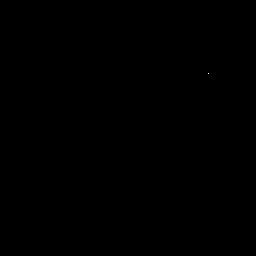

1


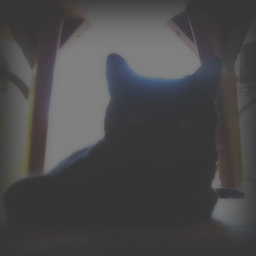

2


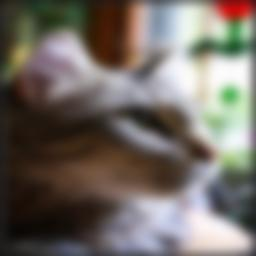

3


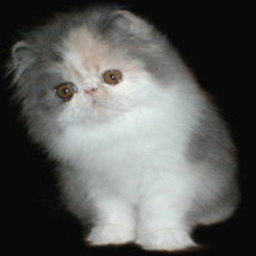

4


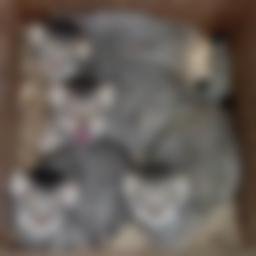

5


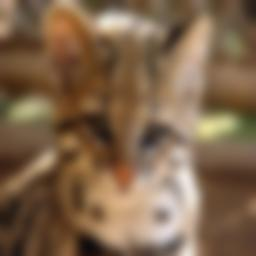

6


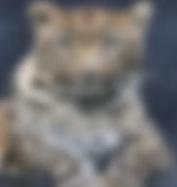

7


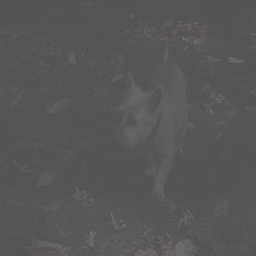

8


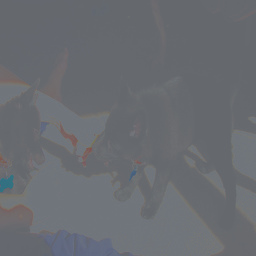

9


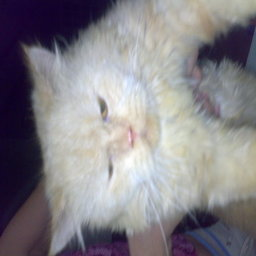

10


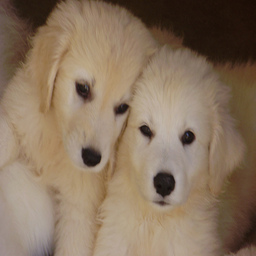

11


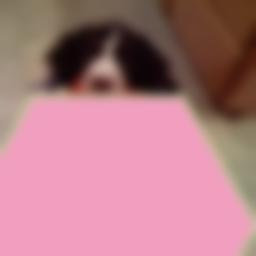

In [40]:
for i, f in enumerate(files):
    print(i)
    display(Image(os.path.join(dataset_path,f)))

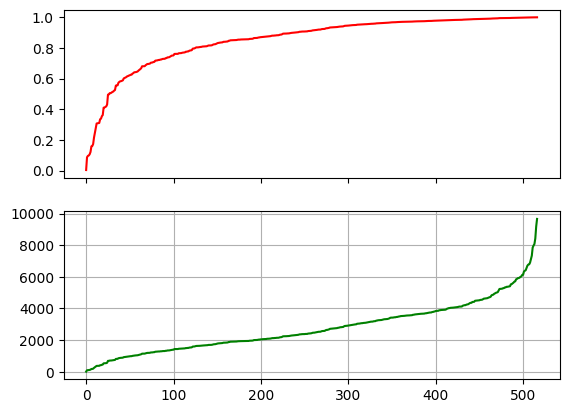

In [15]:
f, (ax1, ax2) = plt.subplots(2, sharex=True)
# scores = 1 - np.exp(-1 * raw_scores * 0.001)
ax1.plot(scores, color='r')
ax2.plot(raw_scores, color='g')
plt.grid(True)

In [85]:
sorted_df[sorted_df['DarkImages score'] < threshold]

,image_name,DarkImages score,DarkImages bool
516,syn_hotpixel.jpg,0.000032,True
471,ILSVRC2012_val_00045859.JPEG,0.041617,True
147,ILSVRC2012_val_00011869.JPEG,0.068045,True
412,ILSVRC2012_val_00040346.JPEG,0.070931,True
105,ILSVRC2012_val_00008290.JPEG,0.089139,True
...,...,...,...
174,ILSVRC2012_val_00014128.JPEG,0.206308,True
431,ILSVRC2012_val_00041896.JPEG,0.207575,True
271,ILSVRC2012_val_00023405.JPEG,0.212691,True
464,ILSVRC2012_val_00044898.JPEG,0.217284,True


In [86]:
top_files = list(sorted_df[sorted_df['DarkImages score'] < threshold]['image_name'])

In [87]:
len(top_files)

38

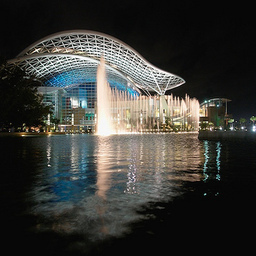

In [97]:
Image.open(os.path.join(dataset_path,top_files[-8]))

In [89]:
top_files[3]

'ILSVRC2012_val_00040346.JPEG'

In [31]:
files = os.listdir(dataset_path)
for f in files:
    if "blur" in f:
        im = Image.open(os.path.join(dataset_path, f))
        im.show()

In [23]:
1-np.exp(-1*260*0.001)

0.22894841419643375